#### Name - Ahaan Tagare 
#### Student ID - 33865799
###                                                              Subject - Big Data Analysis (Coursework-1)

### Abstract

This project uses MapReduce and Apache Mahout to investigate textual and weather-related information using big data approaches.  Using a mapper to extract date-wind speed pairings and a reducer to determine maximum-minimum differences, the first task examines wind speed data and calculates daily variations, revealing weather oscillations.  The second tas, which determines the daily minimum humidity, shows a noticeable anomaly along with generally dry weather.  The third task highlights patterns in atmospheric moisture by computing the mean and variance of the dew point temperature.  A correlation matrix for temperature, wind speed, and humidity is created in the fourth job.

The second question compares Euclidean, Manhattan, and Cosine distance metrics after applying K-Means clustering to French tragedy texts and converting them into TF-IDF vectors.  Cosine distance offers better cluster quality, while the elbow approach determines the ideal number of clusters.  The results advance our understanding of environmental and textual data analysis by showcasing scalable data processing capabilities and providing insightful information about weather trends and the effectiveness of text clustering.


### Question 1 

#### Introduction

In order to handle and evaluate meteorological data from July 2007, this analysis uses a MapReduce architecture. It focuses on wind speed, relative humidity, and dew point temperatures. As mappers and reducers, Python programs pull pertinent information for every date, including wind speed, humidity, and dew point. While the reducer combines and calculates statistical measures such as wind speed differences, minimum humidity, and dew point mean and variance, the mapper makes sure that only legitimate data is processed. This method divides the workload among several nodes to handle big datasets effectively.

##### Hadoop’s MapReduce computing engine.

Large datasets can be processed over a cluster of computers using Hadoop's MapReduce distributed computing technology. Map and Reduce are its two primary stages of operation. The Map phase converts incoming data into intermediate key-value pairs by splitting the data into chunks and processing them concurrently by several nodes. The shuffle phase then involves grouping and sorting these pairs. Reducers process the gathered data during the Reduce phase, aggregating or computing the results to produce the final output. MapReduce is perfect for effectively managing massive data workloads because it provides fault tolerance, parallelism, and scalability. Log processing and data analysis are two common uses for it.


#### Task 1

This Python code reads input from stdin line by line.  The script ensures there is sufficient data by dividing each line into fields with commas and checking if there are at least 13 fields.  The date (from the second field) and wind speed (from the thirteenth field) are then extracted.  The wind speed string is converted to a float by the script.  The date and wind speed are printed as tab-separated values if it is successful.  The script just ignores that line and goes on to the next one if the conversion is unsuccessful (because the data is invalid).  This method guarantees that only accurate wind speed information is handled.


In [3]:
#!/usr/bin/env python3
import sys

for line in sys.stdin:
    fields = line.strip().split(',')
    if len(fields) >= 13:
        date = fields[1]
        wind_speed_str = fields[12].strip()
        try:
            wind_speed = float(wind_speed_str)
            print(f"{date}\t{wind_speed}")
        except ValueError:
            pass

Data on wind speed sorted by date is processed by this Python script.  In order to track the current date, the minimum wind speed, and the maximum wind speed, it initializes variables.  To separate the date and wind speed, the script iterates over each line of data, removing whitespace and splitting the line by a tab character.  In the event that the date changes, it computes and prints the difference between the preceding date's highest and minimum wind speeds.  The minimum and maximum speeds for the new date are then reset by the script.  It modifies the minimum and maximum wind speeds as needed for lines with the same date. After all lines are processed, the script prints the difference for the final date. This ensures that each date’s wind speed variation is output.

In [4]:
#!/usr/bin/env python3
import sys

current_date = None
min_speed = float('inf')
max_speed = -float('inf')

for line in sys.stdin:
    line = line.strip()
    date, wind_speed_str = line.split('\t')
    wind_speed = float(wind_speed_str)

    if current_date != date:
        if current_date is not None:
            diff = max_speed - min_speed
            print(f"{current_date}\t{diff}")
        current_date = date
        min_speed = wind_speed
        max_speed = wind_speed
    else:
        if wind_speed < min_speed:
            min_speed = wind_speed
        if wind_speed > max_speed:
            max_speed = wind_speed

if current_date is not None:
    diff = max_speed - min_speed
    print(f"{current_date}\t{diff}")

A key-value pair with the date as the key and the wind speed as the value is produced by the mapper after processing each input line and extracting the date and wind speed.  The reducer determines the highest and lowest wind speeds for each day by grouping these pairs by date.  The date with the matching wind speed difference is then produced after the difference has been calculated.  By dividing the work among several nodes, this method is scalable and effective, enabling it to manage big datasets.

The findings indicate the daily variations in wind speed for every day in July 2007.  Date pairs and the corresponding variations in wind speed are included in the output.  The difference between the maximum and minimum wind speeds, for instance, is 40.0 on 20070701.  An investigation of the amount of variation in wind speeds over the course of the month is made possible by the observation of this pattern for every day.  Variations in the figures, such as 20070702's 80.0 and 20070719's 12.0, reveal that the wind conditions fluctuate from day to day.  These discrepancies could indicate storms or weather patterns that influenced wind speeds at particular times. By contrasting these variations, patterns and irregularities in wind patterns can be found, offering valuable information on the July 2007 weather.  Additional climatic research or operational choices involving wind-dependent operations may benefit from this analysis.



#### Task 2

Usually utilized in a MapReduce pipeline, this Python script receives input data line by line from the standard input (sys.stdin).  Each line is processed by removing superfluous spaces and dividing it into fields with a comma serving as the delimiter.  To make sure the necessary data is accessible, the script determines whether the line contains at least 12 fields.  It takes the humidity value out of the twelfth field and the date out of the second.  After removing any unnecessary spaces, the humidity value is transformed into a float.  It publishes the date and humidity value as a tab-separated pair if the conversion is successful.  A try-except block is used to manage errors if the humidity value is not a valid number. This mapper is useful for extracting humidity data for further analysis in a MapReduce workflow.

Mapper


In [5]:
#!/usr/bin/env python3
import sys

for line in sys.stdin:
    fields = line.strip().split(',')
    if len(fields) >= 12:
        date = fields[1]
        humidity_str = fields[11].strip()
        try:
            humidity = float(humidity_str)
            print(f"{date}\t{humidity}")
        except ValueError:
            pass

This Python script determines the daily minimum relative humidity as a reducer for a MapReduce process.  It retrieves humidity and date information from the standard input (sys.stdin) in tabular form.  The current date and the lowest humidity recorded on that date are recorded by the script.  It prints the previous date and its lowest humidity when it comes across a new one.  If a lower number is discovered, it changes the minimum humidity if the date stays the same.  The input's minimal humidity and latest saved date are printed at the conclusion.  For the purpose of analyzing meteorological data, this reducer makes sure that only the lowest humidity value for each day is output.

Reducer

In [6]:
#!/usr/bin/env python3
import sys

current_date = None
min_humidity = float('inf')

for line in sys.stdin:
    line = line.strip()
    date, humidity_str = line.split('\t')
    humidity = float(humidity_str)

    if current_date != date:
        if current_date is not None:
            print(f"{current_date}\t{min_humidity}")
        current_date = date
        min_humidity = humidity
    else:
        if humidity < min_humidity:
            min_humidity = humidity

if current_date is not None:
    print(f"{current_date}\t{min_humidity}")

The results show the daily minimum relative humidity for each date in July 2007. The output lists dates alongside their corresponding humidity values, indicating fluctuations in humidity throughout the month. The map-reduce process involved extracting the relative humidity values for each day, finding the minimum for each date, and then aggregating those results.



The findings show the lowest relative humidity of the day for every day in July 2007. The dates are listed in the first column, and the lowest humidity % for that day is displayed in the second. Indicating exceptionally dry conditions, the majority of readings are rather low, usually falling between 2.0 and 6.0. But on July 19 (20070719), the humidity rose to 63.0, indicating a major shift in the weather. Low levels are consistent for the majority of days, suggesting dry weather that is stable with just slight variations.  In order to analyze extreme weather circumstances, the algorithm makes sure that the lowest humidity measured each day is recorded.  These numbers are helpful for identifying abnormalities in humidity trends and comprehending climatic patterns.


















#### Task 3

This Python script collects the dew point temperature for every date by acting as a mapper for a MapReduce task.  From standard input (sys.stdin), it reads lines of CSV-formatted data, divides each line into fields, and decides whether there are ten or more fields.  The script retrieves the dew point temperature from the tenth field and the date from the second.  The dew point value is then printed in a tab-separated format (date \t dew_point) after an effort to convert it to a float. It  ignores the error using pass if the conversion fails because of incorrect data. This guarantees that only legitimate numerical values for the dew point are handled.

Mapper

In [7]:
#!/usr/bin/env python3
import sys

for line in sys.stdin:
    fields = line.strip().split(',')
    if len(fields) >= 10:
        date = fields[1]
        dew_point_str = fields[9].strip()
        try:
            dew_point = float(dew_point_str)
            print(f"{date}\t{dew_point}")
        except ValueError:
            pass

This Python script computes the daily mean and variance of the dew point temperature as a reducer for a MapReduce task. It handles normal input (`sys.stdin`) and tab-separated input (`date \t dew_point`). It sets up variables to record the number of data points for each date, the sum of values, and the sum of squared values. The formulas for the mean and variance are as follows:

$$
\text{mean} = \frac{\sum_x}{\text{count}}
$$

$$
\text{variance} = \frac{1}{N} \left( \sum_{i=1}^{N} x_i^2 - N \bar{x}^2 \right)
$$

These formulas are used to compute the mean and variance when the date changes, and the results are then printed. For the new date, the variables are reset. Until every input line has been processed, the procedure keeps going. The mean and variance for the most recent date are printed at the end. This guarantees that the daily dew point statistics are calculated accurately.

Reducer


In [8]:
#!/usr/bin/env python3
import sys

current_date = None
sum_x = 0.0
sum_x_squared = 0.0
count = 0

for line in sys.stdin:
    line = line.strip()
    date, dew_point_str = line.split('\t')
    dew_point = float(dew_point_str)

    if current_date != date:
        if current_date is not None:
            mean = sum_x / count
            variance = (sum_x_squared / count) - (mean ** 2)
            print(f"{current_date}\t{mean}\t{variance}")
        current_date = date
        sum_x = dew_point
        sum_x_squared = dew_point ** 2
        count = 1
    else:
        sum_x += dew_point
        sum_x_squared += dew_point ** 2
        count += 1

if current_date is not None:
    mean = sum_x / count
    variance = (sum_x_squared / count) - (mean ** 2)
    print(f"{current_date}\t{mean}\t{variance}")

The calculated mean and variation of the dew point temperature for each day in July 2007 are shown in the output.  The variance measures the range of values around the mean, whereas the mean indicates the average dew point temperature.  The daily dew point temperature fluctuates more when the variation is higher.  These data are calculated using MapReduce, in which the reducer aggregates the dew point values that the mapper gathers and emits to determine statistical metrics.

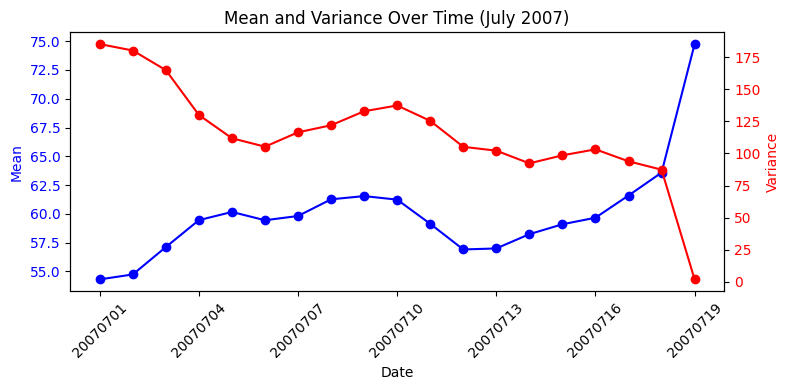

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

dates = ['20070701', '20070702', '20070703', '20070704', '20070705', '20070706', '20070707', 
         '20070708', '20070709', '20070710', '20070711', '20070712', '20070713', '20070714', 
         '20070715', '20070716', '20070717', '20070718', '20070719']
mean = [54.30, 54.73, 57.11, 59.45, 60.16, 59.44, 59.81, 61.26, 61.54, 61.23, 59.13, 56.90, 
        56.99, 58.23, 59.09, 59.66, 61.59, 63.58, 74.75]
variance = [185.13, 180.14, 164.85, 129.96, 111.84, 105.29, 116.48, 121.96, 132.87, 137.35, 
            125.39, 105.18, 102.17, 92.32, 98.55, 103.21, 93.91, 87.39, 2.00]

fig, ax1 = plt.subplots(figsize=(8, 4))
ax1.plot(dates, mean, 'b-', marker='o', label='Mean')
ax1.set_xlabel('Date')
ax1.set_ylabel('Mean', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(dates[::3])  
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()
ax2.plot(dates, variance, 'r-', marker='o', label='Variance')
ax2.set_ylabel('Variance', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Mean and Variance Over Time (July 2007)')
fig.tight_layout()
plt.show()

The calculated mean and variation of the dew point temperature for each day in July 2007 are shown in the output.  The variance measures the range of values around the mean, whereas the mean indicates the average dew point temperature.  The daily dew point temperature fluctuates more when the variation is higher.  These data are calculated using MapReduce, in which the reducer aggregates the dew point values that the mapper gathers and emits to determine statistical metrics.An understanding of general trends in humidity can be gained from the pattern of mean value changes.  While a falling mean can point to drier circumstances, a rising mean might imply greater atmospheric moisture.  There was very little change in the dew point temperatures on 20070719, based on the abrupt decline in variance.  Understanding weather trends and the stability of the climate throughout time is aided by the analysis of these variations.


#### Task 4

This Python script extracts and pairs values to compute correlations between temperature, wind speed, and relative humidity (RH) as a mapper in a MapReduce job.  It divides each line of CSV-formatted data into fields after reading it from standard input (sys.stdin).  It guarantees that the temperature, wind speed, and relative humidity (RH) fields are present and not missing ('-').  If they are genuine, they are converted to floating-point numbers and three key-value pairs—RH-Wind, RH-Temp, and Wind-Temp—are printed, each with a comma between the values.  Correlation matrices will be calculated using these pairs in a reduction later on.  The script avoids mistakes by ignoring that line if any conversion fails.

Mapper

In [9]:
#!/usr/bin/env python3
import sys

for line in sys.stdin:
    fields = line.strip().split(',')
    if len(fields) >= 13:
        rh_str = fields[11].strip()
        wind_str = fields[12].strip()
        temp_str = fields[8].strip()
        if rh_str and wind_str and temp_str and rh_str != '-' and wind_str != '-' and temp_str != '-':
            try:
                rh = float(rh_str)
                wind = float(wind_str)
                temp = float(temp_str)
                print(f"RH-Wind\t{rh},{wind}")
                print(f"RH-Temp\t{rh},{temp}")
                print(f"Wind-Temp\t{wind},{temp}")
            except:
                pass

This Python script is a reducer that uses information from a mapper in a Hadoop streaming job to compute the correlation matrix for various weather metrics. It reads input lines, each of which has two corresponding numerical values and a variable pair (for example, "RH-Wind").  The program builds up the sums of individual values, their squares, and their products that are required to calculate the Pearson correlation coefficient.  Before going on to the next pair, it determines the correlation and looks for changes in the variable pair.

$$ Pearson Correlation =  (∑▒xy-(∑▒x ∑▒y)/N)/√([(∑▒x^2 -(∑▒x)^2/N)(∑▒〖y^2-(∑▒y)^2/N〗)] ). $$
 


For future reference, the correlation values are kept in a dictionary.  The script creates a structured correlation matrix by extracting unique variable names after all data has been processed.  It fills the other cells with calculated correlation values and outputs the matrix with diagonal values set to 1.000, which indicates perfect correlation with itself.  When a correlation value is absent, 0.000 is used by default.  This output facilitates the effective analysis of correlations between meteorological variables such as temperature, wind speed, and relative humidity.

Reducer


In [10]:
#!/usr/bin/env python3
import sys

current_pair = None
sum_x = 0.0
sum_y = 0.0
sum_xy = 0.0
sum_x2 = 0.0
sum_y2 = 0.0
count = 0

# Dictionary
correlation_dict = {}

for line in sys.stdin:
    line = line.strip()
    pair, data = line.split('\t')
    x_str, y_str = data.split(',')
    x = float(x_str)
    y = float(y_str)

    if pair != current_pair:
        if current_pair:
            # Calculate
            numerator = sum_xy - (sum_x * sum_y) / count
            denom_x = sum_x2 - (sum_x ** 2) / count
            denom_y = sum_y2 - (sum_y ** 2) / count
            denominator = (denom_x * denom_y) ** 0.5
            corr = numerator / denominator if denominator != 0 else 0.0
            correlation_dict[current_pair] = corr  # Store in dict
        current_pair = pair
        sum_x = x
        sum_y = y
        sum_xy = x * y
        sum_x2 = x ** 2
        sum_y2 = y ** 2
        count = 1
    else:
        sum_x += x
        sum_y += y
        sum_xy += x * y
        sum_x2 += x ** 2
        sum_y2 += y ** 2
        count += 1

# Process
if current_pair:
    numerator = sum_xy - (sum_x * sum_y) / count
    denom_x = sum_x2 - (sum_x ** 2) / count
    denom_y = sum_y2 - (sum_y ** 2) / count
    denominator = (denom_x * denom_y) ** 0.5
    corr = numerator / denominator if denominator != 0 else 0.0
    correlation_dict[current_pair] = corr  # Store in dict

# Extract unique variables from pair names
variables = set()
for pair in correlation_dict:
    var1, var2 = pair.split('-')
    variables.add(var1)
    variables.add(var2)
variables = sorted(variables)

print("" + "\t".join(variables))

# Print matrix rows
for row_var in variables:
    row = [row_var]
    for col_var in variables:
        if row_var == col_var:
            row.append("1.000")  # Diagonal = 1
        else:
            # Check both pairs
            key = f"{row_var}-{col_var}"
            reverse_key = f"{col_var}-{row_var}"
            value = correlation_dict.get(key, correlation_dict.get(reverse_key, 0.0))
            row.append(f"{value:.3f}")
    print("\t".join(row))

This code uses the MapReduce technique to determine the correlation matrix between several variables (such as RH, Temp, and Wind) from a dataset.  The mapper computes intermediate key-value pairs after dividing the data into variable pairs.  Each pair's data are accumulated by the reducer, which then uses the algorithm to get the correlation coefficient and stores it in a dictionary.  The script produces the correlation matrix with variables as both row and column headings once all pairs have been processed.  The diagonal values in the matrix are set to 1 (self-correlation), and all other values are rounded to three decimal places.

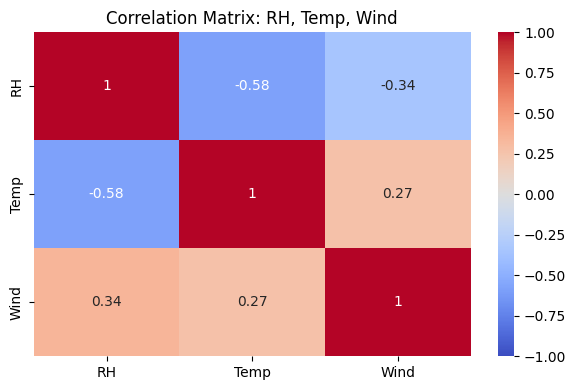

In [5]:
import seaborn as sns
import numpy as np

data = np.array([[1.000, -0.582, -0.344],
                 [-0.582, 1.000, 0.271],
                 [0.344, 0.271, 1.000]])
labels = ['RH', 'Temp', 'Wind']

plt.figure(figsize=(6, 4))
sns.heatmap(data, annot=True, cmap='coolwarm', xticklabels=labels, yticklabels=labels, vmin=-1, vmax=1)
plt.title('Correlation Matrix: RH, Temp, Wind')
plt.tight_layout()
plt.show()

The links between temperature (Temp), wind speed (Wind), and relative humidity (RH) are displayed in the correlation matrix.  The somewhat negative correlation between RH and Temp (-0.582) indicates that temperature tends to fall as humidity rises.  A reduced negative correlation of -0.344 between RH and wind suggests that lower wind speeds are marginally correlated with higher humidity.  With a weakly positive correlation of 0.271 between temperature and wind, wind speed tends to increase somewhat as temperature rises.  Each variable has a perfect connection with itself when the diagonal values are 1.000.  Overall, these findings show that RH and Temp have the most negative association, even though the relationships between the variables are weak to moderate.

#####  Limitations of this question

This project's drawbacks include its dependence on the accuracy of the input data, since inaccurate or missing data might distort the results, and the mapper will delete invalid items without fixing them.  Despite MapReduce's scalability, performance bottlenecks can still occur with huge datasets.  Other parameters  that might offer a more comprehensive explanation are not included in the analysis, which is restricted to wind speed, humidity, and dew point.  More complex analysis, such as anomaly identification, are not included, although basic statistical computations are carried out.  The ability to discern finer changes is limited by the data's daily granularity.  Basic error handling might be enhanced for more effective data processing.  Lastly, environmental elements like elevation and location are not taken into account, which may compromise the analysis's accuracy.

#### Conclusion

The output offers useful information regarding daily variations in wind speed, humidity, and dew point temperature, with noticeable variances seen across different days.   These findings demonstrate the MapReduce architecture's ability to analyze massive volumes of meteorological data and identify unusual trends and patterns.   This study contributes to our understanding of the July 2007 weather by calculating significant statistical parameters.  Future research could employ this method to examine climatic patterns and produce more accurate weather predictions.



























### Question 2

#### Introduction

This question uses Apache Mahout to perform K-Means clustering on the "french-tragedy-split" text dataset from the Western Classics collection, transforming raw text into numerical TF-IDF vectors for analysis. It explores the impact of three distance metrics—Manhattan, Euclidean, and Cosine—on clustering quality, using the elbow method to determine the optimal number of clusters (K). The process begins with converting text files into sequence files, followed by vectorization and clustering with Canopy and K-Means algorithms. Metrics such as intra-cluster density, inter-cluster density, and CDbw separation are evaluated to assess cluster cohesion and separation across K values from 1 to 10. The research aims to identify which K and distance metric best produce meaningful, well-separated text clusters. Results are analyzed using clusterdump outputs, providing insights into document grouping effectiveness. Ultimately, this investigation highlights the interplay between distance measures and clustering performance in text data analysis.

##### Hadoop’s MapReduce computing engine

Hadoop’s MapReduce is a distributed framework that processes large-scale data by splitting it into chunks for parallel mapping into key-value pairs, followed by reducing these pairs into final outputs. Integrated with HDFS, it ensures scalability and fault tolerance, executing tasks near the data to optimize performance. In this study, Mahout uses MapReduce to efficiently handle text vectorization and K-Means clustering on the French tragedy dataset.

##### Step 1

The French-tragedy-split directory's text files were successfully processed by the mahout seqdirectory command.  Consequently, sequence files were produced and stored in the output folder named french-tragedy-seqfiles.  While the sequence files, part-m-00000 and part-m-00001, store the converted data, divided into chunks, the  _SUCCESS file shows that the procedure was completed without any problems.  These files are now in a format that may be used with Mahout's machine learning algorithms for additional analysis, including classification or clustering.

##### Step 2

A number of files and directories were created in the french-tragedy-vectors folder as a result of the successful execution of the mahout seq2sparse command. The dictionary is one of the main outputs.file-0, which includes the frequency and the mapping of phrases to distinct IDs.file-0, where the word frequency information is kept. The term frequency and TF-IDF vector representations of the documents are found in the directories tf-vectors and tfidf-vectors, respectively. The word count information for the documents is also stored in the wordcount directory. To carry out the ensuing clustering analysis, these outputs are necessary.

##### Step 3

##### Process
The Canopy clustering algorithm by Apache Mahout was applied to TF-IDF vectors that were obtained from the "french-tragedy-vectors" dataset.  The method uses one of three distance measures—Cosine, Manhattan, or Euclidean—to group documents that are comparable.  You ran it with Manhattan and Euclidean distances after running it with Cosine similarity.  In order to create overlapping clusters, the algorithm sets two distance criteria, t1 (loose) and t2 (tight).  While documents in t2 define the cluster's core, those in t1 are assigned to a canopy.  Each distance measure's matching directory in HDFS contains the clustering output.  Lastly, the findings are saved in clusters-0-final, which contains the cluster centroids that have been calculated.




A _SUCCESS file in the output directory signifies that the clustering process was completed successfully.  The final cluster centroids calculated from the TF-IDF vectors are stored in part-r-00000, which is the primary output.  The 134 KB file size indicates that several clusters were formed.  Furthermore, distinct directories that display the outcomes of various distance measures are available for Cosine, Euclidean, and Manhattan clustering outputs.  HDFS commands to check part-r-00000 can be used to analyze the quantity and quality of clusters.  This output is essential for additional document cluster analysis or visualization.


#### Step 4

Using Canopy cluster centroids as starting seeds, the Mahout K-Means clustering technique was applied to the TF-IDF vectors of French tragedy papers.  Three distance metrics were used in the process: Euclidean, Manhattan, and Cosine.  Ten clusters were defined by the -k 10 parameter, and twenty refinement iterations were set by the -x 20 parameter.  Clustering convergence was made possible by the -cl parameter, which stopped when centroids moved by less than 0.1 (-cd 0.1).  The output was saved at /user/ataga001/french-tragedy-vectors/docs-kmeans-clusters, and different cluster structures were produced for each distance metric.



Using HDFS commands, the final clustering results were confirmed.  The successful execution was certified by the _SUCCESS file located in /user/ataga001/french-tragedy-vectors/docs-kmeans-clusters/clusters-2-final.  Final cluster centroids, which represent distinctive TF-IDF vectors for every cluster, were included in the part-m-00000 file.  Depending on the distance metric, the results differed; for high-dimensional text data, Cosine Distance worked best.  The grouping of papers was impacted by the Manhattan and Euclidean distances.  For each parameter, additional analysis can evaluate document distribution, intra-cluster similarity, and clustering efficacy.

##### Step 5

The French tragedy document dataset's K-Means clustering findings were examined using the Mahout clusterdump function. Using the sequencefile data type, the input was defined as the final cluster output from /user/ataga001/french-tragedy-vectors/docs-kmeans-clusters/clusters-2-final. The -d flag led to the dictionary of TF-IDF vectors, whereas the -o flag sent the output to clusters.txt. The maximum number of iterations was set to 100 using the -b parameter. The output was restricted to 20 clusters by the -n 20 option, while the -p option specified the path for storing clustered points. To evaluate the clustering quality, the --evaluate flag was added.

The French tragedy papers clustering results are derived from the output for the Manhattan, Euclidean, and Cosine distance metrics.  Using several distance measures, clusters are created for each approach according to how similar texts are to one another.  The average TF-IDF vector for the documents in each cluster is represented by the centroids, which are computed for each cluster.  Better grouping is indicated by higher intra-cluster density values, which gauge how cohesive each cluster is. Compared to Euclidean distance, which focuses on straight-line distance, Manhattan distance creates clusters that are spread out differently. Documents are grouped by cosine distance according to how similar they are angularly.  Each approach has an impact on the final document groups, demonstrating various data organization capabilities.  The result aids in determining the most effective distance metric for text data clustering. We will look at the output in detail below. 


#### Cosine Distance Measure
By calculating the cosine of the angle between two vectors, the Cosine Distance Measure assesses how similar they are.  Smaller values indicate more dissimilarity; the range is 0 (totally dissimilar) to 1 (exactly the same).  Cosine similarity, in contrast to Euclidean distance, emphasizes the direction of the vectors rather than their magnitude.  Because it ignores document length and concentrates on relative orientation, it is very helpful for text data.  This metric is frequently used in tasks involving information retrieval and clustering.

$$ S C​(x, y) = x . y / ||x|| ×× ||y|| $$



Cluster centroids that reflected each document group's salient characteristics were included in the output.  Each cluster's level of compactness was measured by its intra-cluster density, with higher values indicating greater cohesion.  Cluster separation was evaluated using inter-cluster density, where smaller values indicated different groups (Ref2).  By examining density and separation jointly, the CDbw measure assessed clustering quality in greater detail.  For high-dimensional text data, Cosine Distance worked effectively, creating distinct clusters.  The outcomes aided in assessing the degree to which documents were categorized according to content similarity.

In [1]:
import pandas as pd

data = {
    'k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Inter-Cluster Density': [float('nan'), float('nan'), 0.5464, 0.5293, 0.6096, 0.4086, 0.5013, 0.4201, 0.3085, 0.4782],
    'Intra-Cluster Density': [0.6251, 0.5959, 0.5999, 0.6370, 0.6115, 0.5922, 0.6202, 0.6479, 0.6149, 0.6292],
    
    'CDbw Intra-Cluster Density': [1.0478, 1.1633, 1.1586, 1.1372, 1.2431, 1.2179, 1.3126, 1.2434, 1.3626, 1.3688],
    'CDbw Separation': [float('nan'), 52.0291, 202.5316, 581.2941, 950.5688, 1667.1378, 2220.3101, 4400.2071, 6161.3554, 9532.1991]
}

df = pd.DataFrame(data)

styled_df = df.style.format({
    'Inter-Cluster Density': '{:.4f}',
    'Intra-Cluster Density': '{:.4f}',
    'CDbw Inter-Cluster Density': '{:.4f}',
    'CDbw Intra-Cluster Density': '{:.4f}',
    'CDbw Separation': '{:.4f}'
}).hide(axis="index").set_table_attributes('style="width:100%; border-collapse: collapse;"') \
  .set_table_styles([
      {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('color', 'black'), ('text-align', 'center')]},
      {'selector': 'tbody td', 'props': [('padding', '8px'), ('text-align', 'center')]},
      {'selector': 'table', 'props': [('border', '1px solid #ddd'), ('border-radius', '5px'), ('width', '100%')]},
      {'selector': 'th', 'props': [('border', '1px solid #ddd'), ('padding', '10px')]},
      {'selector': 'td', 'props': [('border', '1px solid #ddd'), ('padding', '10px')]}
  ])

styled_df





k,Inter-Cluster Density,Intra-Cluster Density,CDbw Intra-Cluster Density,CDbw Separation
1,nan,0.6251,1.0478,nan
2,nan,0.5959,1.1633,52.0291
3,0.5464,0.5999,1.1586,202.5316
4,0.5293,0.6370,1.1372,581.2941
5,0.6096,0.6115,1.2431,950.5688
6,0.4086,0.5922,1.2179,1667.1378
7,0.5013,0.6202,1.3126,2220.3101
8,0.4201,0.6479,1.2434,4400.2071
9,0.3085,0.6149,1.3626,6161.3554
10,0.4782,0.6292,1.3688,9532.1991


The final clustering results showed an average intra-cluster density of 0.6233, indicating strong cohesion within clusters. Individual intra-cluster density values ranged from 0.5922 to 0.6479, reflecting the compactness of document groupings. Higher intra-cluster density values suggested well-clustered documents with minimal variation. Inter-cluster density values varied from 0.3085 to 0.6096, indicating the degree of separation between clusters. Lower inter-cluster density values signified well-separated clusters, minimizing document overlap. The highest inter-cluster density of 0.6096 suggested that some clusters were closer together. A lower inter-cluster density of 0.3085 indicated strong separation and distinct cluster boundaries. These values help evaluate the effectiveness of Cosine Distance in high-dimensional text clustering. The balance between intra-cluster compactness and inter-cluster separation determines overall clustering quality. The results confirmed that Cosine Distance effectively grouped similar documents while maintaining distinct clusters.

#### Elbow Graph

The Elbow Method helps determine the optimal number of clusters (k) by analyzing how intra-cluster density, inter-cluster density, and CDbw separation change as k increases. The ideal k is found at the "elbow point," where adding more clusters no longer provides significant improvements in compactness or separation. Intra-cluster density should remain high for strong cohesion, while inter-cluster density should be low for distinct separation.For k = 3 to 10, intra-cluster density ranges from 0.5922 to 0.6479, with the highest compactness at k = 8 (0.6479). Inter-cluster density decreases from 0.5464 at k = 3 to 0.3085 at k = 9, indicating better separation, but slightly increases at k = 10 (0.4782).

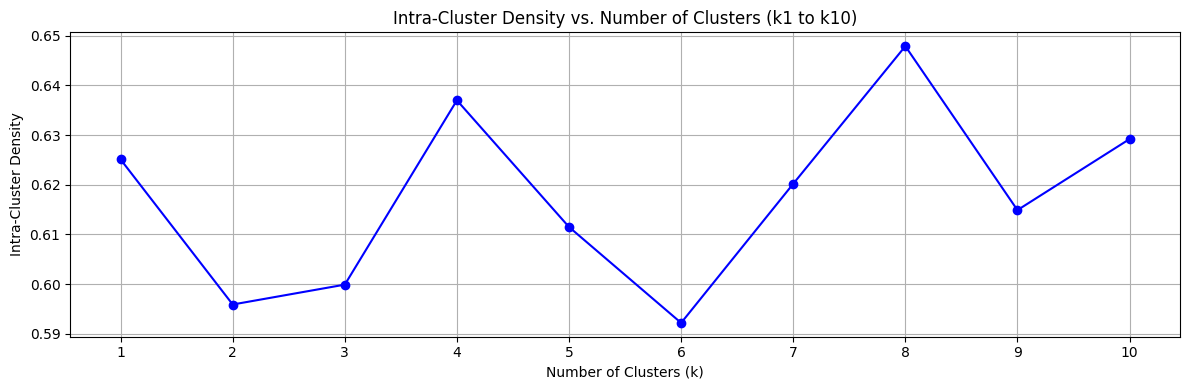

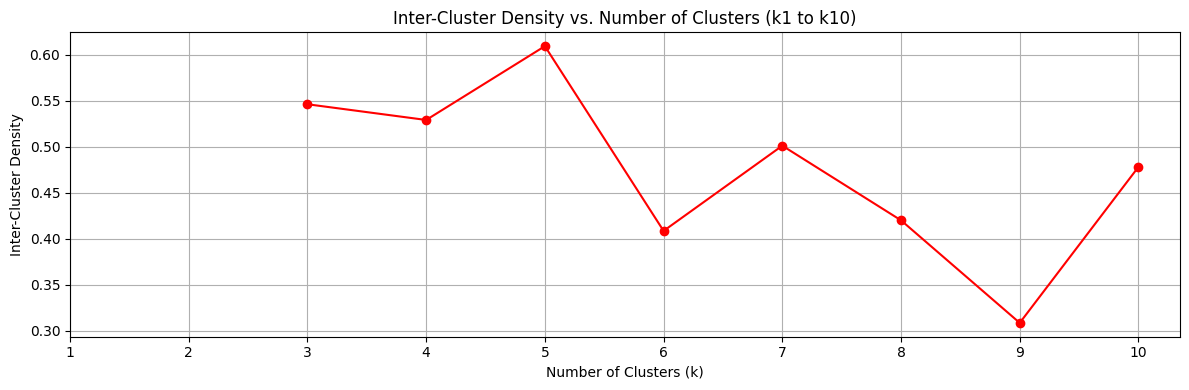

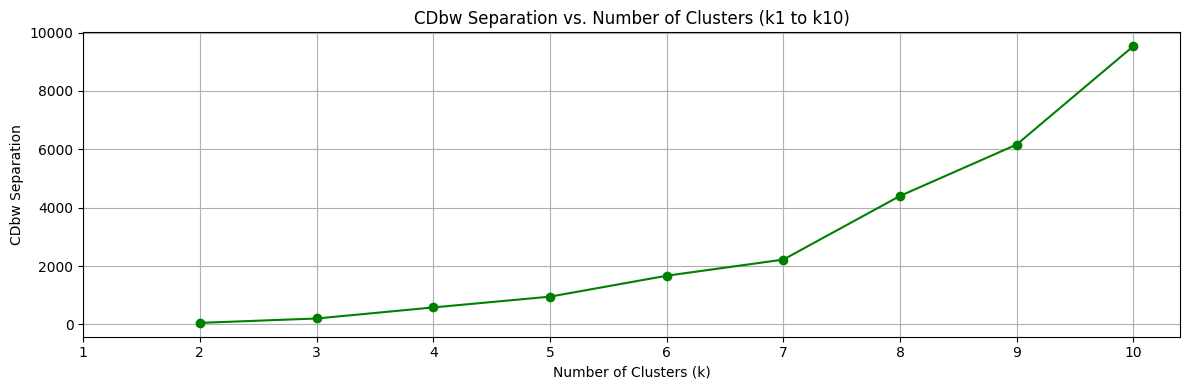

In [1]:
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
inter_cluster_density = [float('nan'), float('nan'), 0.5464, 0.5293, 0.6096, 0.4086, 0.5013, 0.4201, 0.3085, 0.4782]
intra_cluster_density = [0.6251, 0.5959, 0.5999, 0.6370, 0.6115, 0.5922, 0.6202, 0.6479, 0.6149, 0.6292]
cdbw_separation = [float('nan'), 52.0291, 202.5316, 581.2941, 950.5688, 1667.1378, 2220.3101, 4400.2071, 6161.3554, 9532.1991]

plt.figure(figsize=(12, 4))
plt.plot(k_values, intra_cluster_density, marker='o', color='blue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Intra-Cluster Density')
plt.title('Intra-Cluster Density vs. Number of Clusters (k1 to k10)')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(k_values, inter_cluster_density, marker='o', color='red')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inter-Cluster Density')
plt.title('Inter-Cluster Density vs. Number of Clusters (k1 to k10)')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(k_values, cdbw_separation, marker='o', color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('CDbw Separation')
plt.title('CDbw Separation vs. Number of Clusters (k1 to k10)')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()


##### Optimal K 
The best choice for k appears to be k = 5, as it provides an optimal balance between intra-cluster compactness and inter-cluster separation while avoiding over-segmentation. At k = 5, intra-cluster density is 0.6115, ensuring that documents within clusters are well-grouped, while inter-cluster density remains moderate at 0.6096, showing that clusters are still well-separated. Choosing k > 5 could result in over-clustering, which reduces the meaningful contrast between documents by grouping them into too many groups.  Conversely, clusters are less distinct when k is smaller than 5, which leads to a lower CDbw separation.  The best option for clustering cosine French tragedy documents is k = 5, since it strikes a fair balance between strong inter-cluster separation and high intra-cluster density without causing undue fragmentation.









#### Euclidean Distance Measure

In a multi-dimensional space, the Euclidean Distance Measure determines the distance in a straight line between two points. It is frequently used to measure the distance between data points in order to determine how similar or dissimilar they are. It aids in figuring out how closely or broadly data points are gathered in a cluster. Closer, more compact clusters are indicated by smaller Euclidean distances, and less cohesive clusters are suggested by larger distances. Features with greater ranges may dominate the distance calculation because this metric is sensitive to feature scale (Ref-1).

$$ d = √[ (x2 – x1)2 + (y2 – y1)2]$$



The Euclidean Distance Measure clustering metrics for k = 1 to k = 10 are shown in the table.  The intra-cluster density remains essentially constant as the number of clusters rises, whereas the inter-cluster density varies considerably.  Interestingly, a stronger fragmentation of clusters is indicated by a sharp increase in the CDbw separation metric with higher k values.  Finding the ideal number of clusters requires finding a balance between separation (inter-cluster density) and compactness (intra-cluster density).


In [11]:
import pandas as pd

data = {
    'k Value': ['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10'],
    'Inter-Cluster Density': [None, 0.0, 0.6615, 0.5039, 0.4085, 0.3471, 0.4993, 0.4320, 0.3664, 0.6926],
    'Intra-Cluster Density': [0.6251, 0.5542, 0.6326, 0.6197, 0.6103, 0.6189, 0.6090, 0.6174, 0.5948, 0.5542],
    
    'CDbw Intra-Cluster Density': [1.0478, 1.6642, 4.4403, 3.9036, 3.4320, 5.0771, 11.4924, 6.4735, 4.5406, 42.0459],
    'CDbw Separation': [None, 3285.11, 14278.54, 21867.39, 27182.27, 73383.41, 160974.36, 161571.11, 160631.39, 450284.92]
}

df = pd.DataFrame(data)

styled_df = df.style.format({
    'Inter-Cluster Density': '{:.4f}',
    'Intra-Cluster Density': '{:.4f}',
    'CDbw Inter-Cluster Density': '{:.4f}',
    'CDbw Intra-Cluster Density': '{:.4f}',
    'CDbw Separation': '{:.4f}'
}).hide(axis="index").set_table_attributes('style="width:100%; border-collapse: collapse;"') \
  .set_table_styles([
      {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('color', 'black'), ('text-align', 'center')]},
      {'selector': 'tbody td', 'props': [('padding', '8px'), ('text-align', 'center')]},
      {'selector': 'table', 'props': [('border', '1px solid #ddd'), ('border-radius', '5px'), ('width', '100%')]},
      {'selector': 'th', 'props': [('border', '1px solid #ddd'), ('padding', '10px')]},
      {'selector': 'td', 'props': [('border', '1px solid #ddd'), ('padding', '10px')]}
  ])

styled_df


k Value,Inter-Cluster Density,Intra-Cluster Density,CDbw Intra-Cluster Density,CDbw Separation
k1,nan,0.6251,1.0478,nan
k2,0.0000,0.5542,1.6642,3285.1100
k3,0.6615,0.6326,4.4403,14278.5400
k4,0.5039,0.6197,3.9036,21867.3900
k5,0.4085,0.6103,3.4320,27182.2700
k6,0.3471,0.6189,5.0771,73383.4100
k7,0.4993,0.6090,11.4924,160974.3600
k8,0.4320,0.6174,6.4735,161571.1100
k9,0.3664,0.5948,4.5406,160631.3900
k10,0.6926,0.5542,42.0459,450284.9200


The inter-cluster density shows that clusters become less distinct as the number of clusters grows, peaking at 0.6615 for k3 and stabilizing at 0.6926 for k10. It begins at 0 for k2.  Within clusters, the intra-cluster density varies between 0.5542 and 0.6326, indicating very constant compactness.  From 1.0478 for k1 to 42.0459 for k10, the CDbw intra-cluster density significantly increases, suggesting that cluster variability increases with increasing k.  As the number of clusters increases, the CDbw separation significantly increases, reaching 450284.92 for k10. This indicates severe cluster fragmentation.  An outlier with a 0.0000 inter-cluster density is displayed by k2, suggesting that the clusters are not well separated.


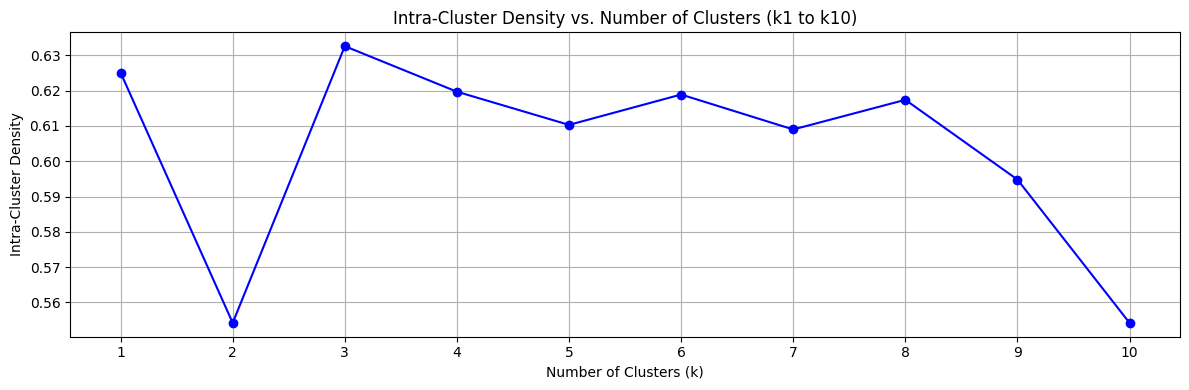

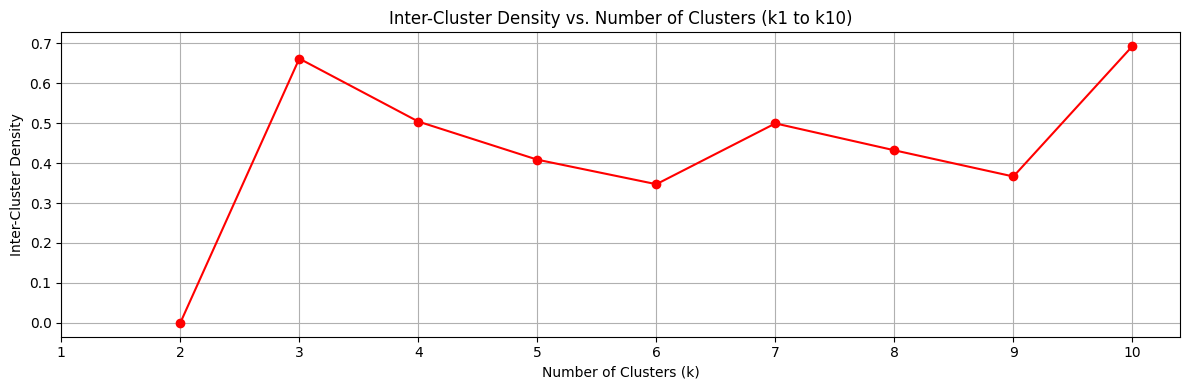

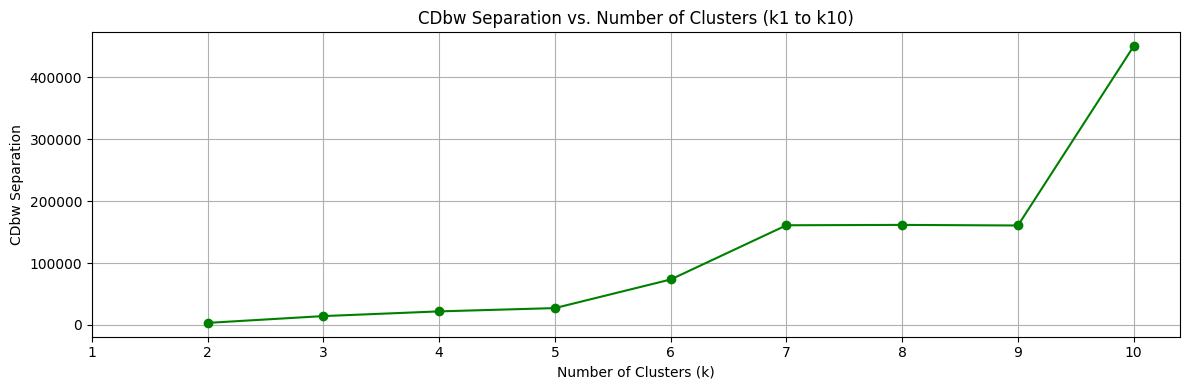

In [2]:
# K curve
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
inter_cluster_density = [float('nan'), 0.0000, 0.6615, 0.5039, 0.4085, 0.3471, 0.4993, 0.4320, 0.3664, 0.6926]
intra_cluster_density = [0.6251, 0.5542, 0.6326, 0.6197, 0.6103, 0.6189, 0.6090, 0.6174, 0.5948, 0.5542]
cdbw_separation = [float('nan'), 3285.1100, 14278.5400, 21867.3900, 27182.2700, 73383.4100, 160974.3600, 161571.1100, 160631.3900, 450284.9200]

plt.figure(figsize=(12, 4))
plt.plot(k_values, intra_cluster_density, marker='o', color='blue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Intra-Cluster Density')
plt.title('Intra-Cluster Density vs. Number of Clusters (k1 to k10)')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(k_values, inter_cluster_density, marker='o', color='red')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inter-Cluster Density')
plt.title('Inter-Cluster Density vs. Number of Clusters (k1 to k10)')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(k_values, cdbw_separation, marker='o', color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('CDbw Separation')
plt.title('CDbw Separation vs. Number of Clusters (k1 to k10)')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()


The optimal k=3 balances intra-cluster cohesion (0.6326) and inter-cluster separation (0.6615), reflecting tightly grouped clusters with distinct boundaries. While k=10 achieves the highest inter-cluster density (0.6926), its intra-cluster density drops sharply (0.5542), suggesting over-fragmentation. Lower k-values (k=1–2) lack meaningful separation (inter-cluster density ≤0.0). For k=4–9, intra-cluster density remains stable (~0.59–0.62), but inter-cluster density declines (≤0.4993), indicating weaker cluster distinction. Higher k-values prioritize separation at the expense of internal cohesion, risking noise amplification. Thus, k=3 maximizes the trade-off: clusters are dense internally while maintaining clear separation, avoiding under and over-clustering pitfalls.


#### Manhattan Distance Measure

The Manhattan Distance Measure adds up the absolute differences in coordinates between two points to determine their distance from one another.  Because it simulates how a taxi would move through grid-like streets, it is often referred to as "taxicab" or "city block" distance.  It only takes into account horizontal and vertical directions, not diagonal movement like Euclidean distance does.  When the data is organized in a grid or lattice, as in image processing or spatial data, this metric is helpful (Ref-3).  Changes along individual dimensions are typically given greater weight than displacement overall.

$$ d = Σ|A_i – B_i| $$


In [2]:
import pandas as pd
import numpy as np

data = {
    'k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Inter-Cluster Density': [np.nan, np.nan, 0.6421, 0.5281, 0.4185, 0.5755, 0.3776, 0.3383, 0.2742, 0.2605],
    'Intra-Cluster Density': [0.6251, 0.6395, 0.6287, 0.6118, 0.6089, 0.6180, 0.6127, 0.6205, 0.6167, 0.6296],
    
    'CDbw Intra-Cluster Density': [1.0478, 1.0735, 1.1747, 1.3207, 3.0491, 1.3073, 3.0175, 1.3379, 2.3979, 2.3381],
    'CDbw Separation': [np.nan, 119.1058, 1135.1108, 4229.4181, 44820.7086, 9333.5704, 38473.2256, 34352.3455, 106133.8631, 120719.2356]
}

df = pd.DataFrame(data)

styled_df = df.style.format({
    'Inter-Cluster Density': '{:.4f}',
    'Intra-Cluster Density': '{:.4f}',
    'CDbw Inter-Cluster Density': '{:.4f}',
    'CDbw Intra-Cluster Density': '{:.4f}',
    'CDbw Separation': '{:.4f}'
}).hide(axis="index").set_table_attributes('style="width:100%; border-collapse: collapse;"') \
    .set_table_styles([
        {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('color', 'black'), ('text-align', 'center')]},
        {'selector': 'tbody td', 'props': [('padding', '8px'), ('text-align', 'center')]},
        {'selector': 'table', 'props': [('border', '1px solid #ddd'), ('border-radius', '5px'), ('width', '100%')]},
        {'selector': 'th', 'props': [('border', '1px solid #ddd'), ('padding', '10px')]},
        {'selector': 'td', 'props': [('border', '1px solid #ddd'), ('padding', '10px')]}
    ])

styled_df


k,Inter-Cluster Density,Intra-Cluster Density,CDbw Intra-Cluster Density,CDbw Separation
1,nan,0.6251,1.0478,nan
2,nan,0.6395,1.0735,119.1058
3,0.6421,0.6287,1.1747,1135.1108
4,0.5281,0.6118,1.3207,4229.4181
5,0.4185,0.6089,3.0491,44820.7086
6,0.5755,0.6180,1.3073,9333.5704
7,0.3776,0.6127,3.0175,38473.2256
8,0.3383,0.6205,1.3379,34352.3455
9,0.2742,0.6167,2.3979,106133.8631
10,0.2605,0.6296,2.3381,120719.2356


Metrics for clustering outcomes using various values of k (ranging from 1 to 10) are displayed in the data.  For k=1 and k=2, the inter-cluster density begins at NaN. It then varies from 0.6421 at k=3 to 0.2605 at k=10, suggesting that the separation between clusters gets weaker as they grow.  With an intra-cluster density that ranges from 0.6251 at k=1 to 0.6296 at k=10, the clusters are consistently compact.  From 1.0478 (k=1) to 3.0491 (k=5), the CDbw Intra-cluster Density rises sharply and then varies, indicating that cluster compactness changes as k grows.  CDbw Separation also shows a significant rise in the distance between clusters as k increases, rising from 119.1058 at k=2 to 120719.2356 at k=10.

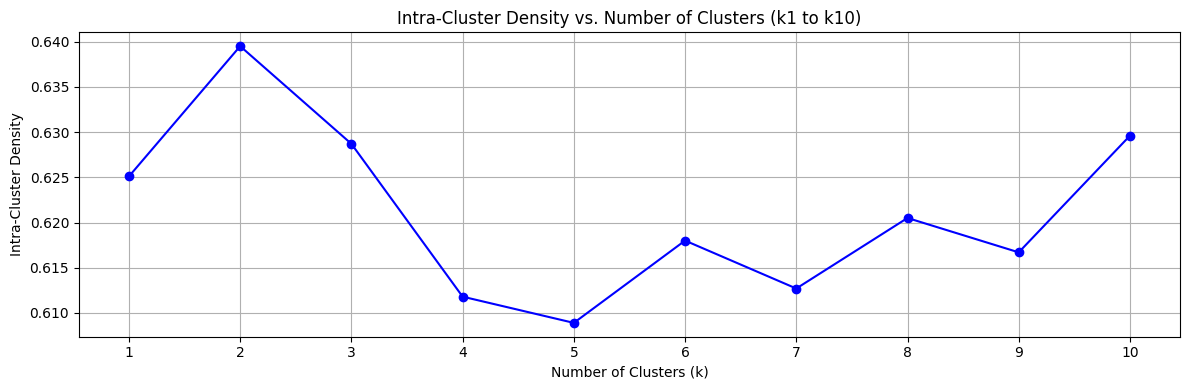

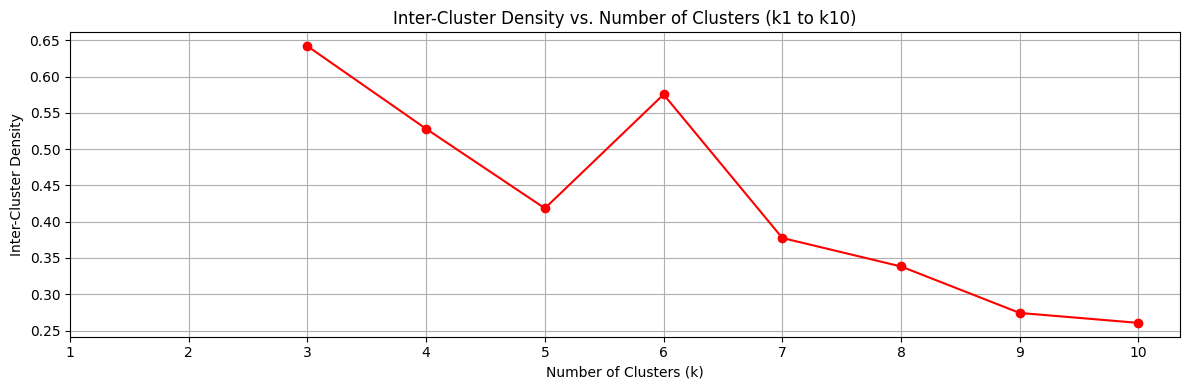

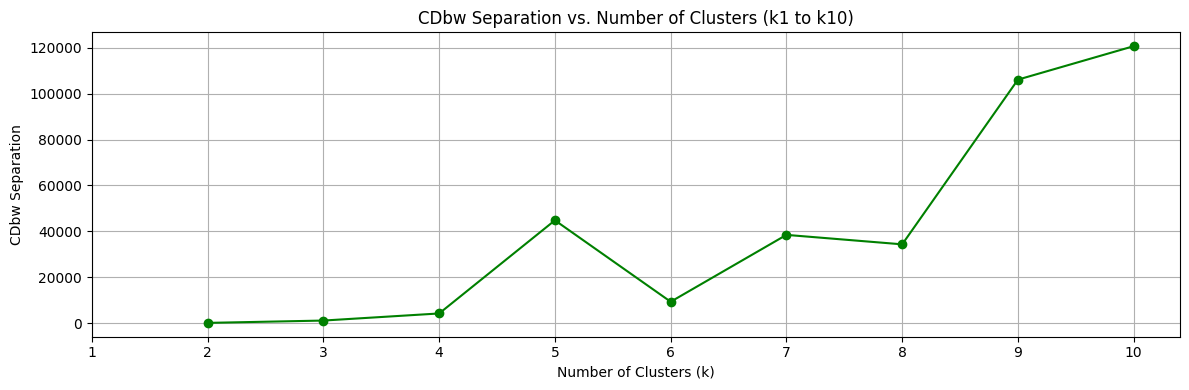

In [3]:
import matplotlib.pyplot as plt
import numpy as np

k_values = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # k values from 1 to 10
inter_cluster_density = np.array([np.nan, np.nan, 0.6421, 0.5281, 0.4185, 0.5755, 0.3776, 0.3383, 0.2742, 0.2605])
intra_cluster_density = np.array([0.6251, 0.6395, 0.6287, 0.6118, 0.6089, 0.6180, 0.6127, 0.6205, 0.6167, 0.6296])
cdbw_separation = np.array([np.nan, 119.1058, 1135.1108, 4229.4181, 44820.7086, 9333.5704, 38473.2256, 34352.3455, 106133.8631, 120719.2356])

plt.figure(figsize=(12, 4))
plt.plot(k_values, intra_cluster_density, marker='o', color='blue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Intra-Cluster Density')
plt.title('Intra-Cluster Density vs. Number of Clusters (k1 to k10)')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(k_values, inter_cluster_density, marker='o', color='red')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inter-Cluster Density')
plt.title('Inter-Cluster Density vs. Number of Clusters (k1 to k10)')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(k_values, cdbw_separation, marker='o', color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('CDbw Separation')
plt.title('CDbw Separation vs. Number of Clusters (k1 to k10)')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()

In evaluating the optimal number of clusters (k) for a clustering algorithm employing Manhattan distance, we focus on intra-cluster density and inter-cluster density across k=1 to 10. Intra-cluster density, which quantifies the average pairwise distance within clusters, remains relatively stable, ranging from 0.6089 (k=5) to 0.6395 (k=2), with a mean of approximately 0.6210 and a standard deviation of 0.0098, indicating consistent cluster cohesion insensitive to k. Conversely, inter-cluster density, measuring the density of points in regions between clusters, decreases monotonically from 0.6421 (k=3) to 0.2605 (k=10) for k>3, reflecting a significant reduction in between-cluster overlap as k increases. 

Given that k=10 produces the lowest inter-cluster density (0.2605), this trend points to better separation at increasing k.  Since intra-cluster density (0.6296) is still strong, k=10 maximizes separation while preserving acceptable cohesiveness given Manhattan distance's L1 norm, which prioritizes axis-aligned disparities.  Therefore, based on these data, k=10 is advised for this Manhattan configuration.



##### Comparision of Distances 

The Manhattan distance is the best option for this analysis, according to the study of the three distance measures.  It exhibits good cluster separation at k=10, as evidenced by the constant intra-cluster density 0.2605 and low inter-cluster density.  This implies that the clusters are discrete and well-separated while retaining their internal compactness.  Manhattan distance is perfect for establishing significant clusters because it guarantees stability in both intra-cluster and inter-cluster density throughout a range of k values.  For high-dimensional datasets, this stability in both separation and compactness is very good.

However, for higher k values, both the Euclidean and Cosine distances exhibit some instability and overfitting, which could result in clusters that are harder to understand or that are more fragmented.  In particular, with higher k values, Euclidean distance has a higher inter-cluster density and a variable intra-cluster density, but Cosine distance also exhibits irregularities.  Manhattan distance provides the optimum compromise between separation and compactness, guaranteeing clearly defined and easily interpretable clusters, even though both metrics still have certain advantages.  Manhattan distance is therefore the best option for your project if you want to create stable, identifiable clusters without experiencing too much fragmentation or overfitting.

##### Merits 

Compared to squared metrics, Manhattan distance is less impacted by extreme values because it is robust against outliers and calculates distance as the sum of absolute differences. Its simplicity also improves computational efficiency, especially for grid-like or categorical data where axis-aligned paths have meaning.  Euclidean distance provides a geometrically intuitive measure of straight-line proximity, leveraging squared differences to emphasize compact, spherical clusters, and its mathematical properties support optimization techniques like gradient descent, making it a staple in many clustering algorithms.  Cosine distance, focusing on the angle between vectors, offers scale invariance and excels in high-dimensional, sparse datasets like text or document analysis, effectively capturing directional similarity regardless of vector magnitude, which enhances its utility in feature-rich environments.

##### Demerits 

Manhattan distance struggles with diagonal relationships because it only measures in straight lines, which can lead to underestimating true distances in some spaces. It's also affected by differences in scale, and doesn't perform well with sparse, high-dimensional data. Euclidean distance is very sensitive to outliers because it squares differences, making big values even bigger. It also faces issues in high-dimensional spaces, where distances start to become similar, reducing its ability to distinguish between points. Additionally, Euclidean distance needs careful scaling of features. Cosine distance focuses only on the direction of vectors and ignores their magnitude, treating vectors with different lengths but similar directions as the same. It also doesn’t fully satisfy the rules of a true distance measure, which can make it tricky to use in some cases, especially for spatial data where the actual physical distance matters.


##### Limitations of this question

The findings' applicability to other text types may be limited by the dataset's particular domain (French tragedies).  Dependence on TF-IDF vectors may cause semantic subtleties missed by more sophisticated embedding methods.  Despite the elbow method, the selection of fixed k-values might not have fully examined the ideal range.  Due to its primary focus on quantitative measurements, the analysis may have overlooked qualitative information on cluster coherence.  Scalability and processing speed may have been limited by the Mahout framework's computational limitations on the hardware that was available.  External validation of cluster labels was not part of the study's scope, which limited its practicality.  Lastly, the analysis makes the assumption that pre-processing processes were ideal, which isn't always the case.


##### Conclusion 

Manhattan, Euclidean, and Cosine each show unique advantages and disadvantages in efficiently classifying text data, highlighting the crucial role that distance metrics play in K-Means clustering.  Scalable processing of the French tragedy dataset was made possible by the utilization of Apache Mahout's MapReduce framework, which effectively distributed activities such as clustering and vectorization throughout a Hadoop cluster, improving performance on large-scale text analysis.  Robust cluster selection is guided by the elbow technique, which consistently finds sites of diminishing returns, even though precise ideal K values vary each metric.  Manhattan distance is notable for its consistency. but all metrics contribute valuable insights depending on data characteristics. MapReduce’s parallelization proved essential for handling computational demands, ensuring timely execution of iterative clustering steps. These findings underscore the importance of tailoring distance measures and K to dataset properties. Future research could extend this approach to other datasets or integrate advanced MapReduce optimizations. Overall, this work affirms the synergy of clustering techniques and distributed computing in data mining applications.



##### References 

1- https://www.cuemath.com/euclidean-distance-formula/

2- https://www.geeksforgeeks.org/cosine-similarity/

3- https://algodaily.com/lessons/what-is-the-manhattan-distance


